In [88]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 


#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#deep learning libraraies
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
 


import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.vgg16 import VGG16 ## pretrained model 



In [89]:
from keras.applications.vgg16 import VGG16

In [90]:
import os
print(os.listdir('flowers/flowers'))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [91]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='flowers/flowers/daisy'
FLOWER_SUNFLOWER_DIR='flowers/flowers/sunflower'
FLOWER_TULIP_DIR='flowers/flowers/tulip'
FLOWER_DANDI_DIR='flowers/flowers/dandelion'
FLOWER_ROSE_DIR='flowers/flowers/rose'


In [66]:
def assign_label(img,flower_type):
    return flower_type
    
    
    
# 5 Class Problem - 5 different kind of flowers


# All this flowers of each types in folders which is name by flowers

In [92]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR) # imread to read my image from local
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        
        
# 5 Folders for 5 different Flowers 

# Each Folder is one class of flower for me
        

In [93]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 769/769 [00:01<00:00, 619.29it/s]

769


In [94]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 734/734 [00:01<00:00, 494.52it/s]

1503


In [95]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 984/984 [00:01<00:00, 560.82it/s]

2487


In [96]:
make_train_data('dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████| 1052/1052 [00:01<00:00, 579.47it/s]

3539


In [97]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 784/784 [00:01<00:00, 600.67it/s]

4323


## Visualizing some Random Images

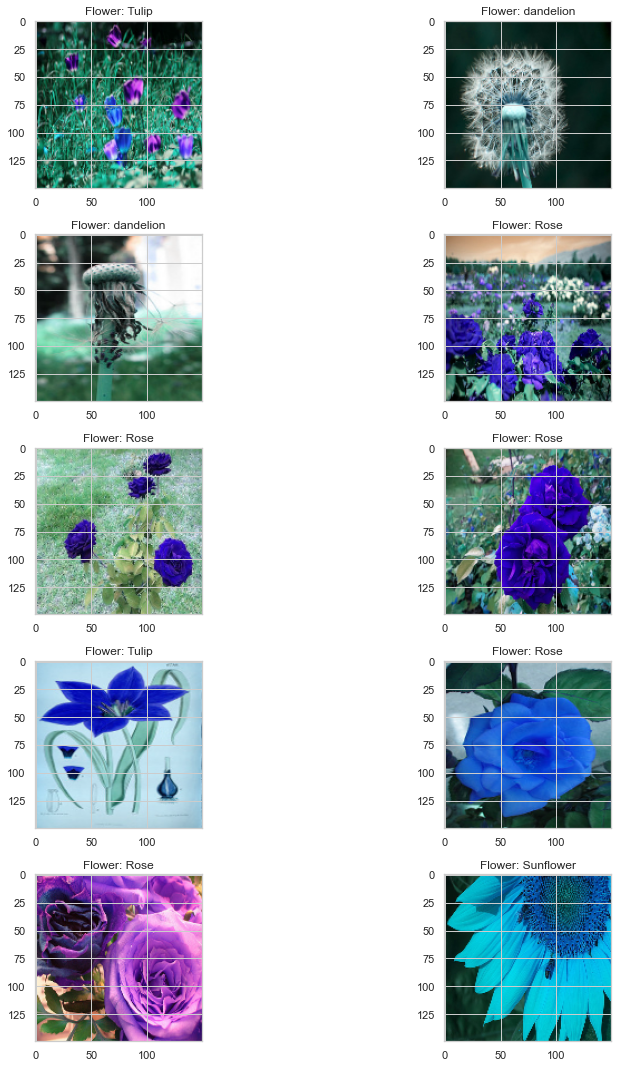

In [99]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()
        

## Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding 

In [100]:

# Daisy , Tulip 

le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y)
X=np.array(X)


# categorial 

# depedent var - Flow types - 5 -  


# Image 1   -- Daisy --       Daisy , Rose , Dende , hh , hh1
# Image1 -- Daisy             1 , 0 , 0 , 0 ,0 
# Image 2 - Rose              0 , 1, 0 , 0 ,0 

In [101]:
X

array([[[[134, 136, 136],
         [143, 144, 144],
         [147, 147, 147],
         ...,
         [150, 152, 152],
         [152, 154, 154],
         [152, 152, 152]],

        [[132, 134, 134],
         [142, 143, 143],
         [146, 146, 146],
         ...,
         [150, 152, 152],
         [151, 153, 153],
         [151, 151, 151]],

        [[131, 134, 134],
         [139, 141, 142],
         [145, 144, 146],
         ...,
         [152, 154, 154],
         [150, 151, 151],
         [147, 147, 147]],

        ...,

        [[ 26,  47,  44],
         [ 25,  46,  43],
         [ 26,  47,  44],
         ...,
         [125, 126, 130],
         [124, 125, 129],
         [125, 126, 130]],

        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 27,  48,  45],
         ...,
         [127, 127, 131],
         [125, 126, 130],
         [124, 126, 129]],

        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 27,  48,  45],
         ...,
         [127, 128, 132],
        

In [103]:
Y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

## Splitting into Training and Validation Sets

In [104]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [105]:
np.random.seed(42)
rn.seed(42)
#tf.set_random_seed(42)

<a id="content3"></a>
## Modelling

##  Specifying the Base Model



In our case we are using the VGG16 model from the Keras.Applications library as the base model.

In [106]:
base_model= VGG16(include_top=False, weights='imagenet',input_shape=(150,150,3), pooling='avg')

## transfer learning 
 
    # include_top ->> False 
    
    # 5 flows - 5 class problem 
    
    # Weight- Imagenet - >>> Weights for the VGG16 layer will be import 

In [107]:
base_model.summary()

## imported existing VGG16 model 

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

## Adding our Own Fully Connected Layers

In [108]:
model=Sequential()

model.add(base_model) 

model.add(Dense(256,activation='relu'))


model.add(Dense(5,activation='softmax'))




In [109]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 1285      
Total params: 14,847,301
Trainable params: 14,847,301
Non-trainable params: 0
_________________________________________________________________


In [110]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

##  Using a Learning Rate & the Summary

In [111]:
epochs=50
batch_size=128
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=2, verbose=1)

# Reduce learning rate when a metric has stopped improving.

# Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. 
#This callback monitors a quantity and if no improvement is 
# seen for a 'patience' number of epochs, the learning rate is reduced.


# monitor: quantity to be monitored.
# factor: factor by which the learning rate will be reduced. new_lr = lr * factor.
# patience: number of epochs with no improvement after which learning rate will be reduced.
# verbose: int. 0: quiet, 1: update messages.

In [112]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 1285      
Total params: 14,847,301
Trainable params: 14,847,301
Non-trainable params: 0
_________________________________________________________________


This is now the complete summary of our model that we shall use to classify the images.

##  Compiling & Training the Model

#### USING BASE MODEL AS A FEATURE EXTRACTOR.

In [113]:
base_model.trainable=False # setting the VGG model to be untrainable.

In [114]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 1285      
Total params: 14,847,301
Trainable params: 132,613
Non-trainable params: 14,714,688
_________________________________________________________________


In [115]:
model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

# Optimiter 
# Loss Function 
# Metric - Accuracy 

In [ ]:
model_train = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 20, validation_data = (x_test,y_test),
                              verbose = 1)

Epoch 1/20
26/26 [==============================] - 181s 7s/step - loss: 4.5822 - accuracy: 0.3118 - val_loss: 3.4917 - val_accuracy: 0.4228
Epoch 2/20
26/26 [==============================] - 189s 7s/step - loss: 2.4383 - accuracy: 0.5022 - val_loss: 2.3051 - val_accuracy: 0.5486
Epoch 3/20
26/26 [==============================] - 181s 7s/step - loss: 1.7411 - accuracy: 0.6070 - val_loss: 1.8191 - val_accuracy: 0.6078
Epoch 4/20
26/26 [==============================] - 185s 7s/step - loss: 1.4496 - accuracy: 0.6548 - val_loss: 1.5860 - val_accuracy: 0.6355
Epoch 5/20
26/26 [==============================] - 165s 6s/step - loss: 1.2665 - accuracy: 0.6727 - val_loss: 1.4472 - val_accuracy: 0.6670
Epoch 6/20
26/26 [==============================] - 182s 7s/step - loss: 1.0915 - accuracy: 0.7051 - val_loss: 1.3526 - val_accuracy: 0.6892
Epoch 7/20
26/26 [==============================] - 169s 7s/step - loss: 0.9958 - accuracy: 0.7261 - val_loss: 1.2790 - val_accuracy: 0.7040
Epoch 8/20
26